In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [24]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'martial-status', 'occupation', 'relationship', 'race',
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                'native-country', 'label']

train_df = pd.read_csv('adult.data',names = cols, header = None ,index_col = False)
test_df = pd.read_csv('adult.test',names = cols, header = None ,index_col = False, skiprows = 1)

In [25]:
train_df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [26]:
# Data cleaning:
# education num is a label encoding, we want to do one-hot so we drop education-num
#train_df = train_df.drop('education-num', axis='columns')
#test_df = test_df.drop('education-num', axis='columns')

# drop all rows with unknown values
def clear_unknown_rows(df):
    df = df.replace(' ?',np.NaN)
    # existed in test but not training set, can do this in a better way but skipping for now
    df = df.replace(' Holand-Netherlands', np.NaN)
    df = df.dropna()
    return df

train_df = clear_unknown_rows(train_df)
test_df = clear_unknown_rows(test_df)
train_df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


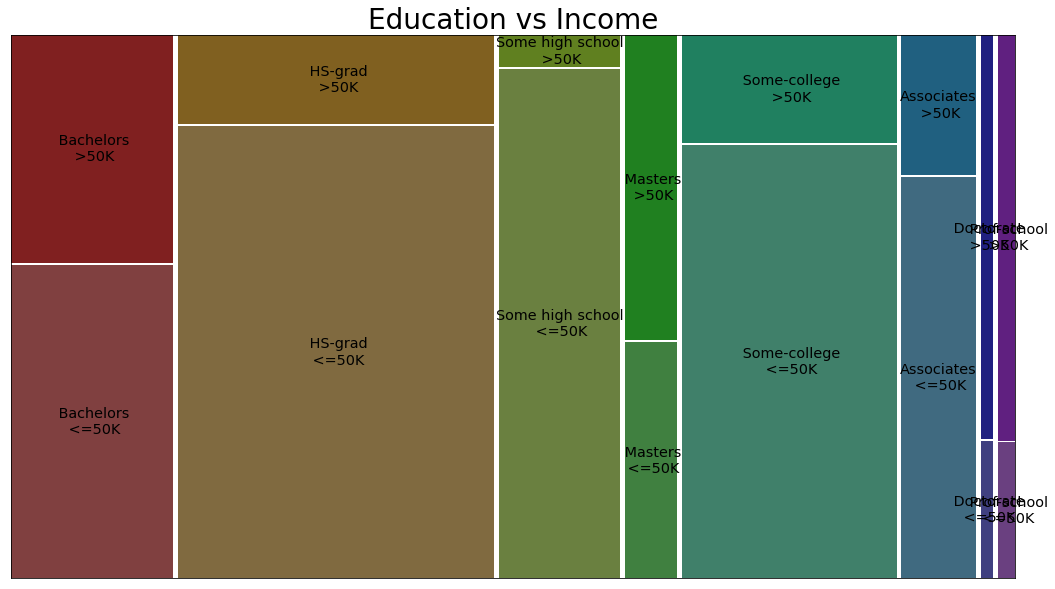

In [27]:
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
education_df = train_df.copy()
education_df.loc[education_df.education.str.contains('1st') |
                 education_df.education.str.contains('2nd') |
                 education_df.education.str.contains('3rd') |
                 education_df.education.str.contains('4th') |
                 education_df.education.str.contains('5th') |
                 education_df.education.str.contains('6th') |
                 education_df.education.str.contains('7th') |
                 education_df.education.str.contains('8th') |
                 education_df.education.str.contains('9th') |
                 education_df.education.str.contains('10th') |
                 education_df.education.str.contains('11th') |
                 education_df.education.str.contains('12th') |
                 education_df.education.str.contains('Preschool'),
                 'education'] = 'Some high school'

education_df.loc[education_df.education.str.contains('Assoc'), 'education'] = 'Associates'

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
mosaic(education_df, ['education', 'label'], ax=axes, axes_label=False, title="Education vs Income")
plt.show()

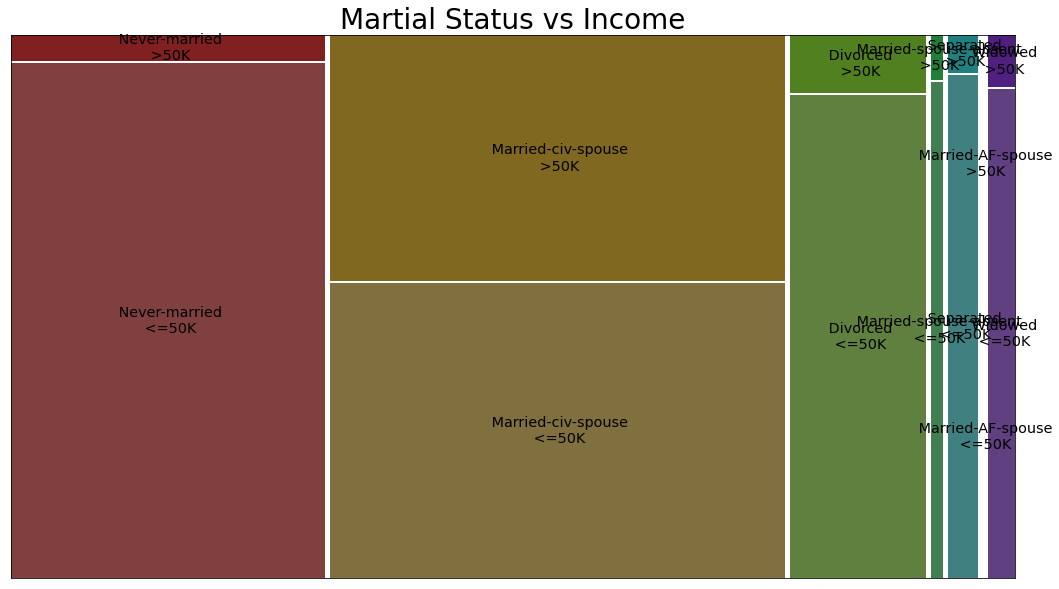

In [28]:

plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
mosaic(train_df, ['martial-status', 'label'], ax=axes, axes_label=False, title="Martial Status vs Income")
plt.show()

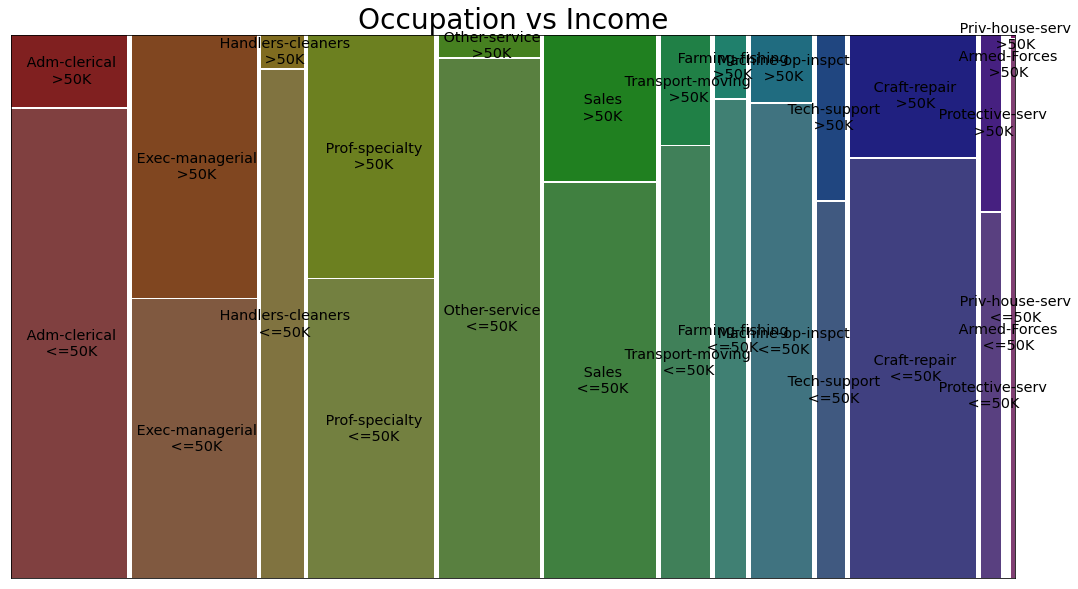

In [29]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
mosaic(train_df, ['occupation', 'label'], ax=axes, axes_label=False, title="Occupation vs Income")
plt.show()

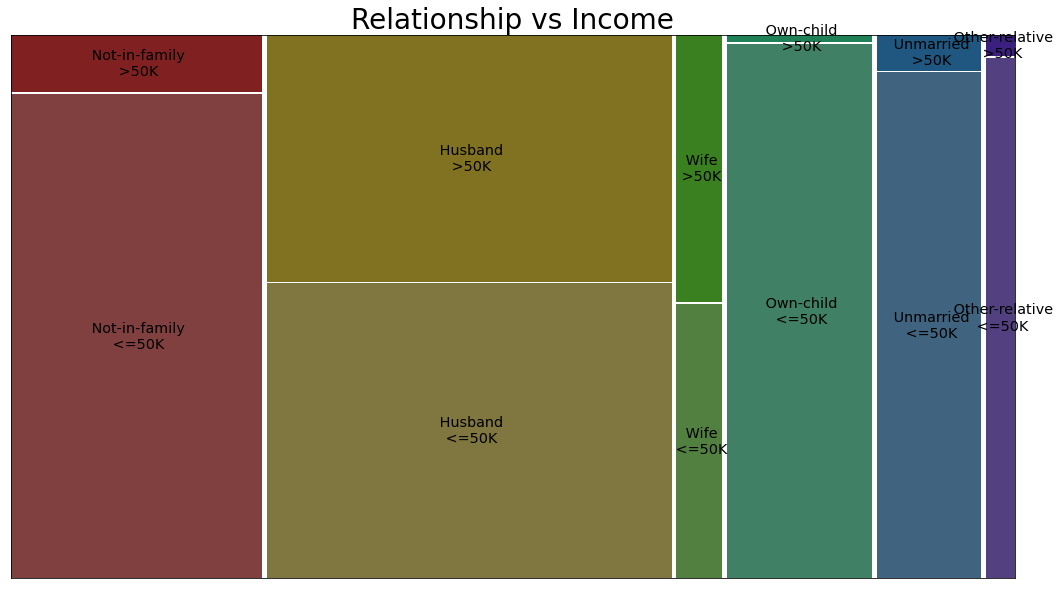

In [30]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
mosaic(train_df, ['relationship', 'label'], ax=axes, axes_label=False, title="Relationship vs Income")
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import copy
tmp = copy.copy(train_df['label'])
train_df.replace({' <=50K.': 0, ' >50K.' : 1, ' <=50K': 0, ' >50K' : 1}, inplace=True)
train_df['salary'] = copy.copy(tmp)
para = train_df[['education-num','age','capital-gain','label']].copy()
para_array = MinMaxScaler().fit_transform(para.values)
train_df.head()


,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,<=50K


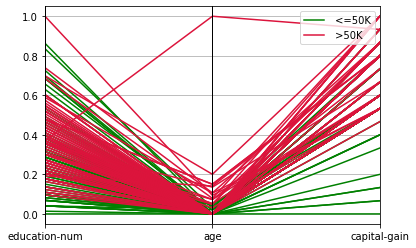

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: salary, Length: 30161, dtype: object


In [32]:
para = pd.DataFrame(para_array)
train_df.index = para.index
para['salary'] = train_df['salary']
para.columns = ['capital-gain','education-num','age','label','salary']
under = para[para["label"] == 0.0].sample(n=100)
above = para[para["label"] == 1.0].sample(n=100)
para = pd.concat([under, above])
pd.plotting.parallel_coordinates(para, 'salary', cols=['education-num','age', 'capital-gain'], color=('#008000','#DC143C'))
plt.show()
print(train_df['salary'])